In [18]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from IPython.display import display

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [19]:
df = pd.read_csv(r"./../data/HealthInsurance.csv")
df.head()

,Age,Purchased Health Insurance
0,46,1
1,32,0
2,66,1
3,43,1
4,37,0


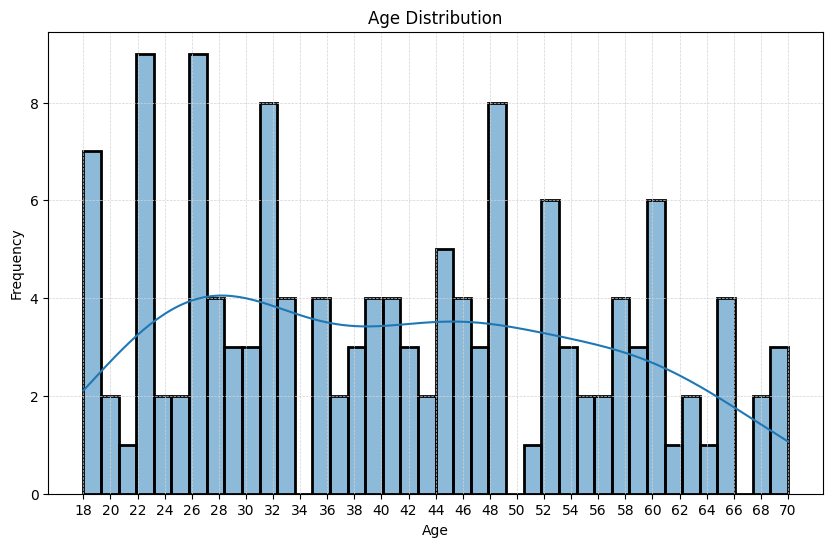

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df["Age"], bins=40, kde=True, edgecolor='black', linewidth=2)
plt.title("Age Distribution")
plt.xlabel("Age")

plt.ylabel("Frequency")
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
plt.xticks(ticks=range(df["Age"].min(), df["Age"].max()+2, 2))
plt.show()

In [21]:
def sigMoid(x):
    return 1 / (1 + np.exp(-x))

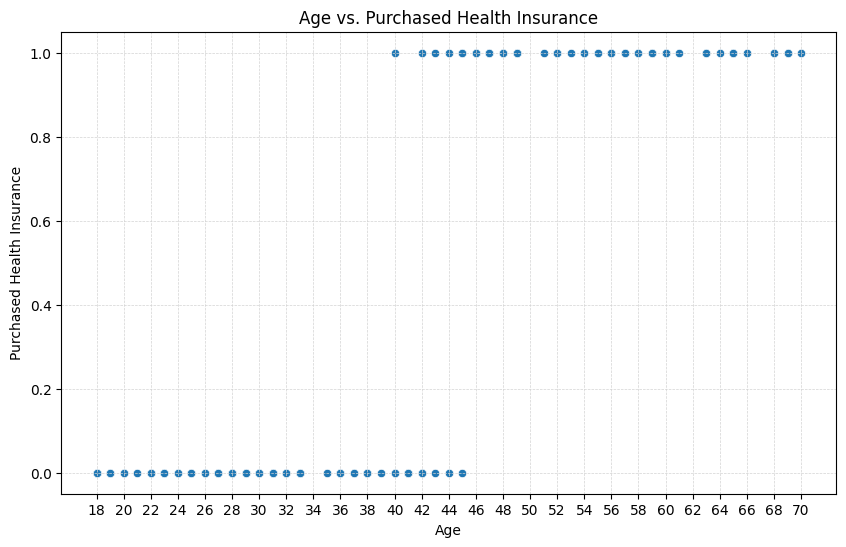

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Age", y="Purchased Health Insurance")
plt.title("Age vs. Purchased Health Insurance")
plt.xlabel("Age")
plt.ylabel("Purchased Health Insurance")
plt.xticks(ticks=range(df["Age"].min(), df["Age"].max()+2, 2))
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
plt.show()

In [41]:
x = df[["Age"]]
y = df["Purchased Health Insurance"]

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
model = LogisticRegression()
model.fit(x_train, y_train)

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

print(f"Model Coefficients: {model.coef_[0][0]:.4f}")
print(f"Train Accuracy: {model.score(x_train, y_train):.4f}")
print(f"Test Accuracy: {model.score(x_test, y_test):.4f}")

Model Coefficients: 0.9374
Train Accuracy: 0.9630
Test Accuracy: 0.9643


In [43]:
def plot_confusion_matrix(cm, title="Confusion Matrix"):
    cm_prob = cm / np.sum(cm)
    print(f"{title}:\n{cm}")
    print(f'Prediction Accuracy: {np.round(100 * (cm_prob[0][0] + cm_prob[1][1]), 2)}%')

    plt.figure(figsize=(10, 6))
    sns.heatmap(
        cm_prob,
        annot=True,
        fmt=".2%",
        cmap="Blues",
        cbar=True,
        square=True,
    )
    plt.title(title)
    plt.show()


Train Confusion Matrix:
[[60  2]
 [ 2 44]]
Prediction Accuracy: 96.3%


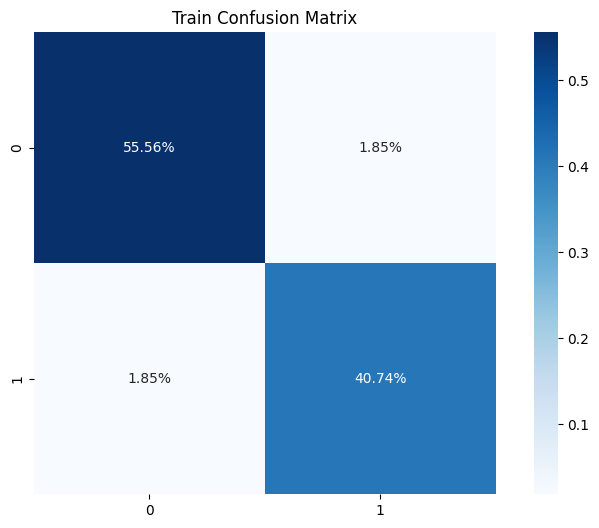

In [44]:
cm_train = confusion_matrix(y_train, y_train_pred)
plot_confusion_matrix(cm_train, title="Train Confusion Matrix")

Train Confusion Matrix:
[[13  0]
 [ 1 14]]
Prediction Accuracy: 96.43%


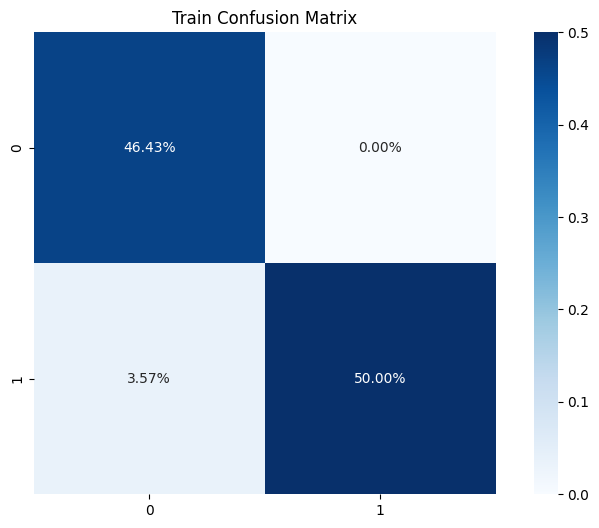

In [45]:
cm_test = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm_test, title="Train Confusion Matrix")

In [46]:
# from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Train Accuracy: {np.round(100*train_accuracy, 1)}%')

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {np.round(100*test_accuracy, 1)}%')

Train Accuracy: 96.3%
Test Accuracy: 96.4%


In [77]:
x_point = pd.DataFrame({"Age": [43, 67]})
pred_prob = model.predict_proba(x_point)
predictions = model.predict(x_point)

for i, prediction in enumerate(predictions):
    if prediction == 1:
        print(f"Member of {x_point["Age"][i]} Will purchase health insurance with probability {pred_prob[i][1]:.2%}")
    else:
        print(f"Member of {x_point["Age"][i]} Will not purchase health insurance with probability {pred_prob[i][0]:.2%}")

Member of 43 Will not purchase health insurance with probability 63.17%
Member of 67 Will purchase health insurance with probability 100.00%
